# Multiple linear regression

Using the Auto dataset in the ISLR package;
- Produce a scatterplot matrix which includes all of the variables in the data set.
- Compute the matrix of correlations between the variables 
- Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Comment on the output. For instance:
     - Is there a relationship between the predictors and the response?
     - Which predictors appear to have a statistically significant relationship to the response?

**Import dataset**

In [1]:
library(ISLR)

In [2]:
df <- Auto
df <- Auto[,-9] #remove name variable
head(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,18,8,307,130,3504,12.0,70,1
2,15,8,350,165,3693,11.5,70,1
3,18,8,318,150,3436,11.0,70,1
4,16,8,304,150,3433,12.0,70,1
5,17,8,302,140,3449,10.5,70,1
6,15,8,429,198,4341,10.0,70,1


**Exploratory analysis**

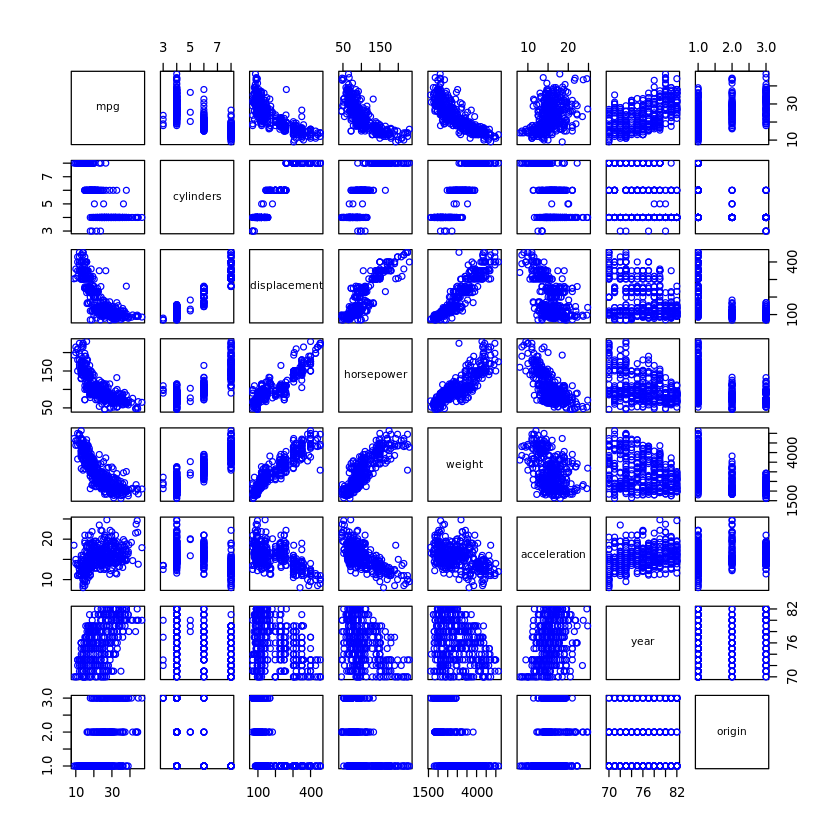

In [3]:
pairs(df, col = "blue")

**Correlation analysis**

In [4]:
cor(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


The correlation matrix shows that there is negative correlation between the response variable (MPG) and the variables (except for acceleration, year and origin).

**Regression analysis**

In [5]:
df.lm <- lm(mpg~., data = df)
summary(df.lm)


Call:
lm(formula = mpg ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


**Model diagnostics**

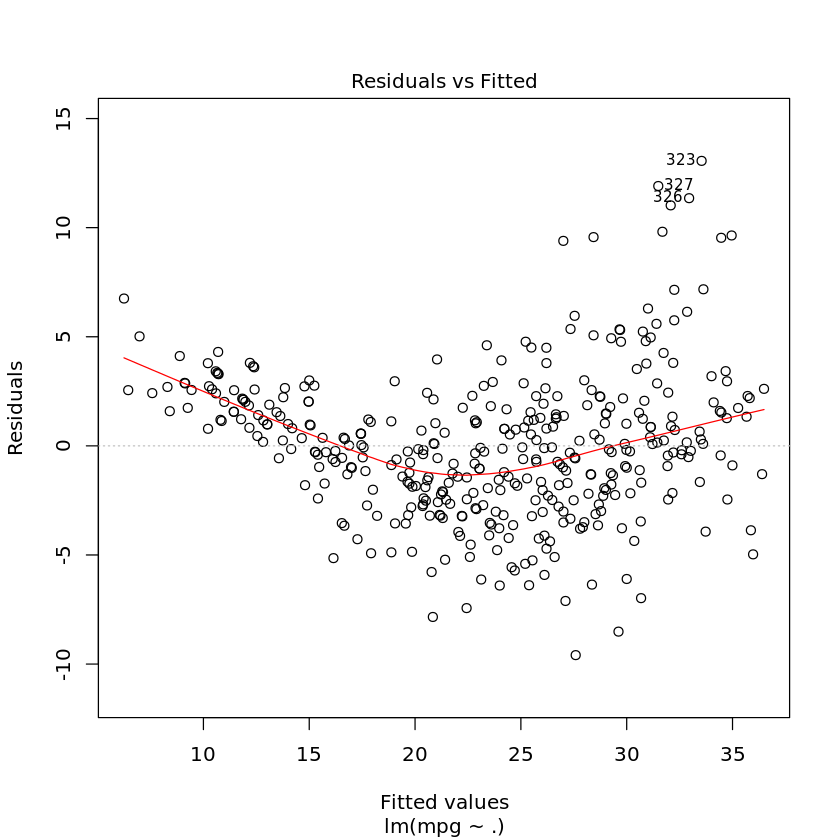

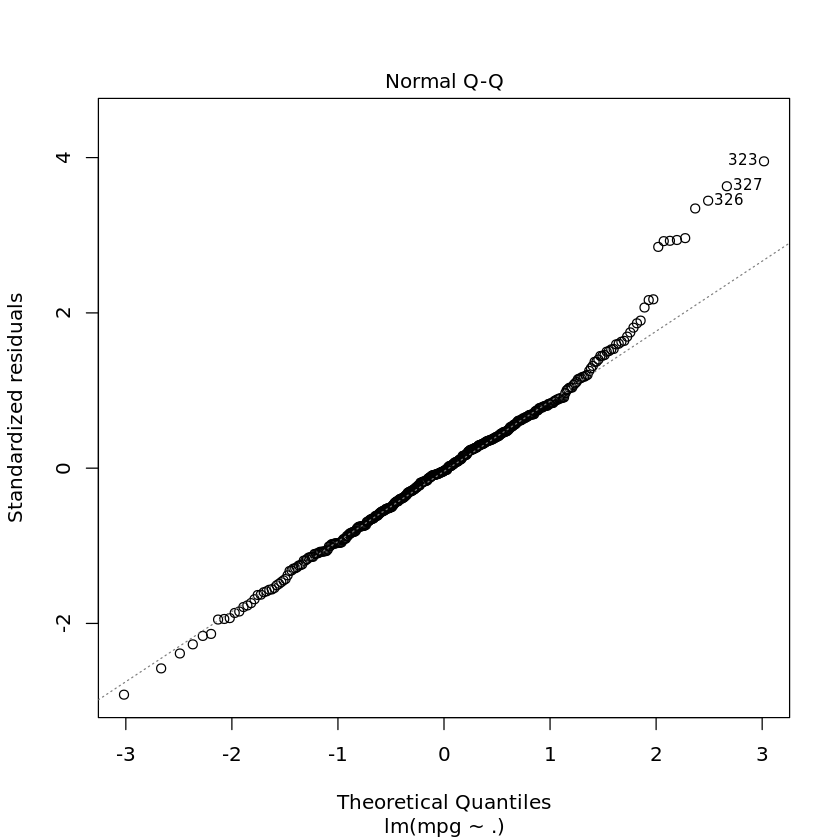

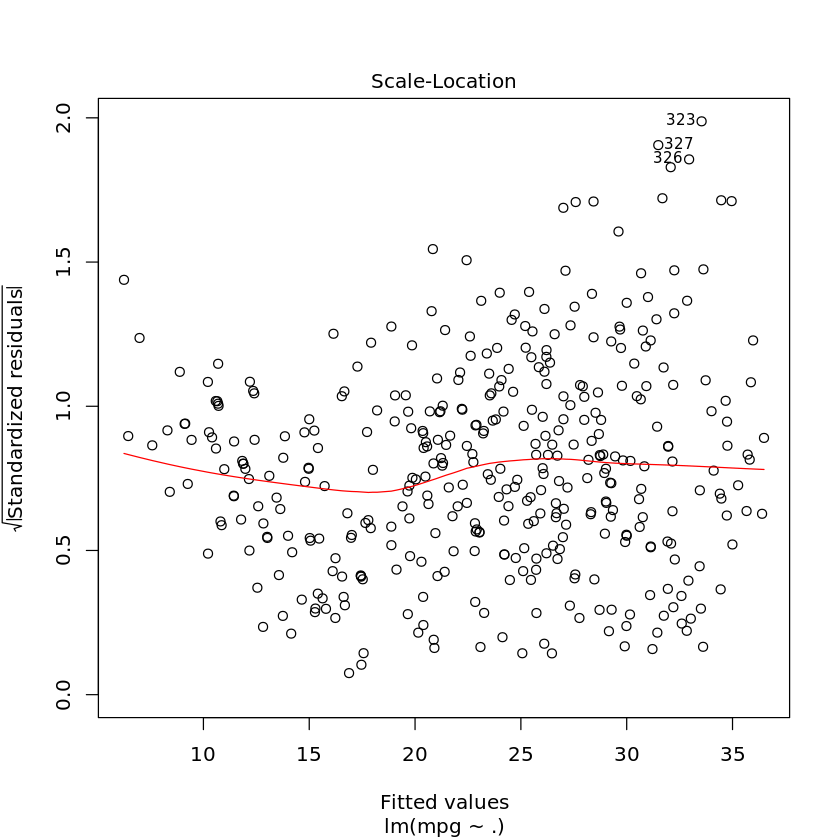

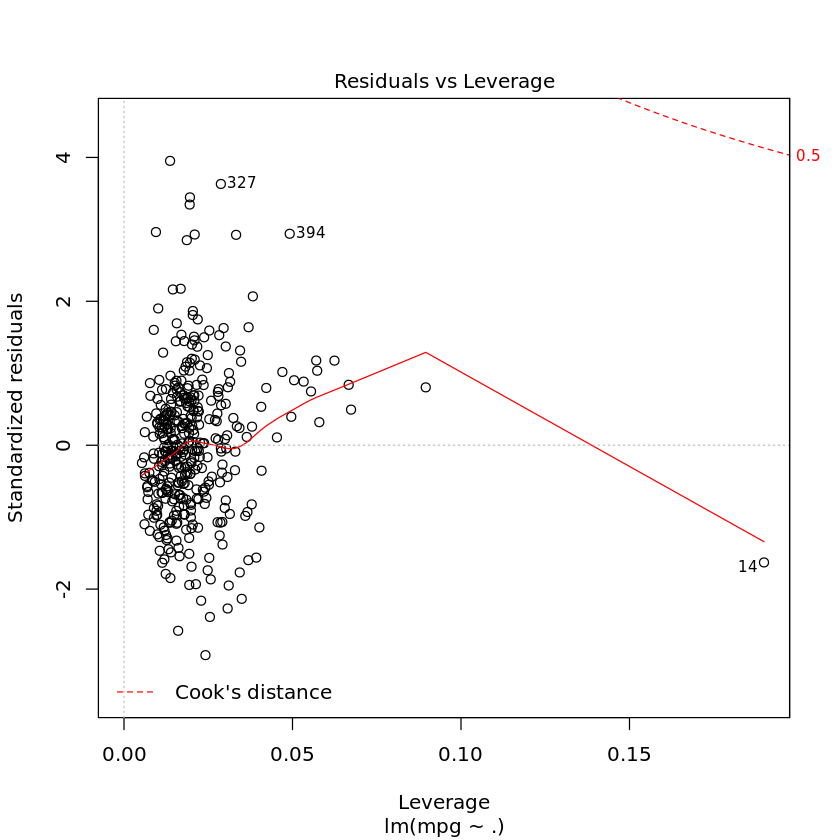

In [6]:
plot(df.lm)

The model diagnostics plots show that there is no linearity between the predictors and the response variable. The normal Q-Q plot shows that there is normal distribution of the observations. The third plot shows tha there is independence between the variables while the last plot shows that there is no influential observation.

**Non-linear transformation**

In [7]:
df <- df[-14,]
df$mpg <- log(df$mpg)
df.lm2 <- lm(mpg~., data = df)
summary(df.lm2)


Call:
lm(formula = mpg ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40831 -0.06662  0.00201  0.06776  0.34448 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.735e+00  1.663e-01  10.432  < 2e-16 ***
cylinders    -2.966e-02  1.161e-02  -2.554  0.01104 *  
displacement  7.374e-04  2.774e-04   2.658  0.00818 ** 
horsepower   -1.286e-03  5.095e-04  -2.524  0.01200 *  
weight       -2.693e-04  2.524e-05 -10.669  < 2e-16 ***
acceleration -2.056e-04  3.618e-03  -0.057  0.95472    
year          2.971e-02  1.824e-03  16.288  < 2e-16 ***
origin        4.073e-02  9.940e-03   4.098 5.09e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1189 on 383 degrees of freedom
Multiple R-squared:  0.8796,	Adjusted R-squared:  0.8774 
F-statistic: 399.8 on 7 and 383 DF,  p-value: < 2.2e-16


The regression model is given as :<br>
*mpg = 0.7309 - 0.009(cylinders) + 0.0002(displacement) - 0.0006(horsepower) - 0.00008(weight) + 0.00934(year) + 0.0112(origin)* <br>
- There is decrease in MPG by 0.009 units for every one unit increase in cylinders, keeping all other variables constant.
- There is increase in MPG by 0.0002 units for every one unit increase in displacement, keeping all other variables constant.
- There is decrease in MPG by 0.0006 units for every one unit increase in horsepower, keeping all other variables constant.
- There is decrease in MPG by 0.00008 units for every one unit increase in weight, keeping all other variables constant.
- There is increase in MPG by 0.00934 units for every one unit increase in year, keeping all other variables constant.
- There is increase in MPG by 0.0112 units for every one unit increase in origin, keeping all other variables constant.


**Model diagnostics**

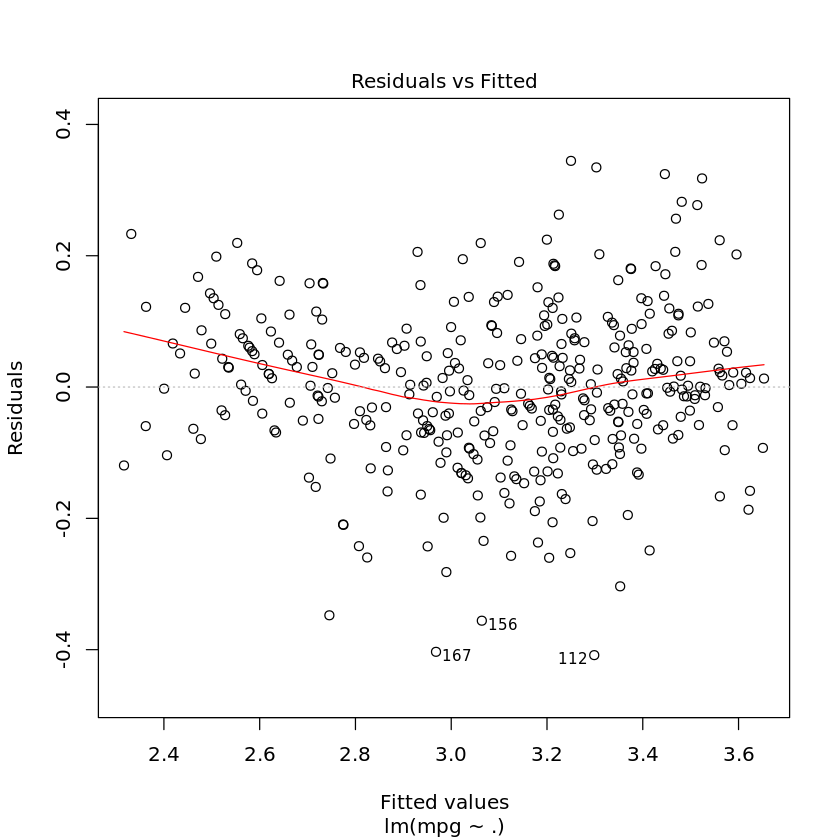

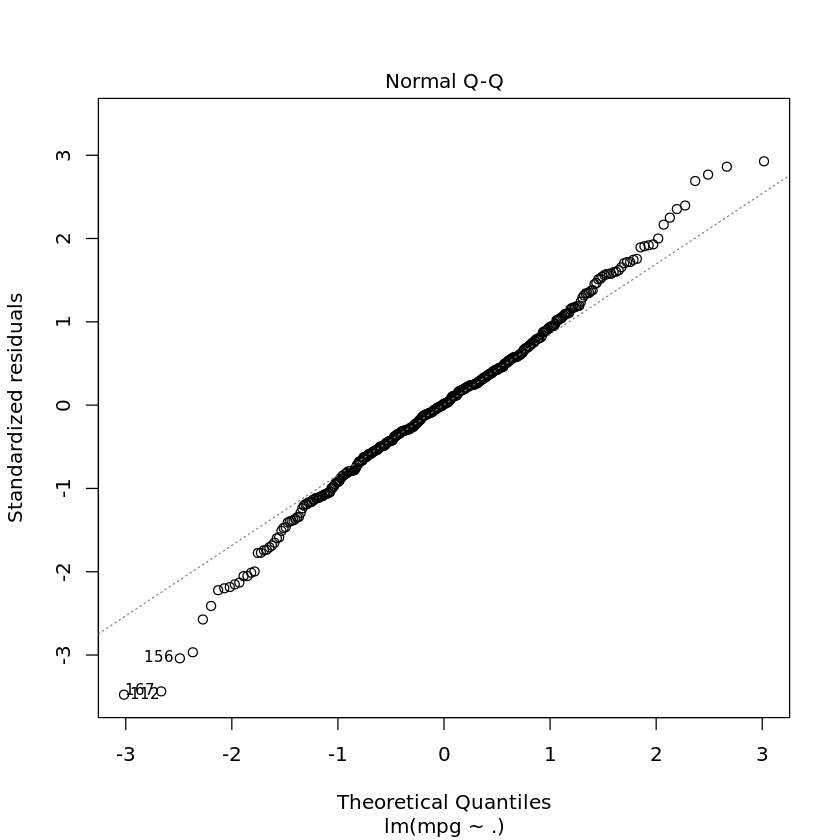

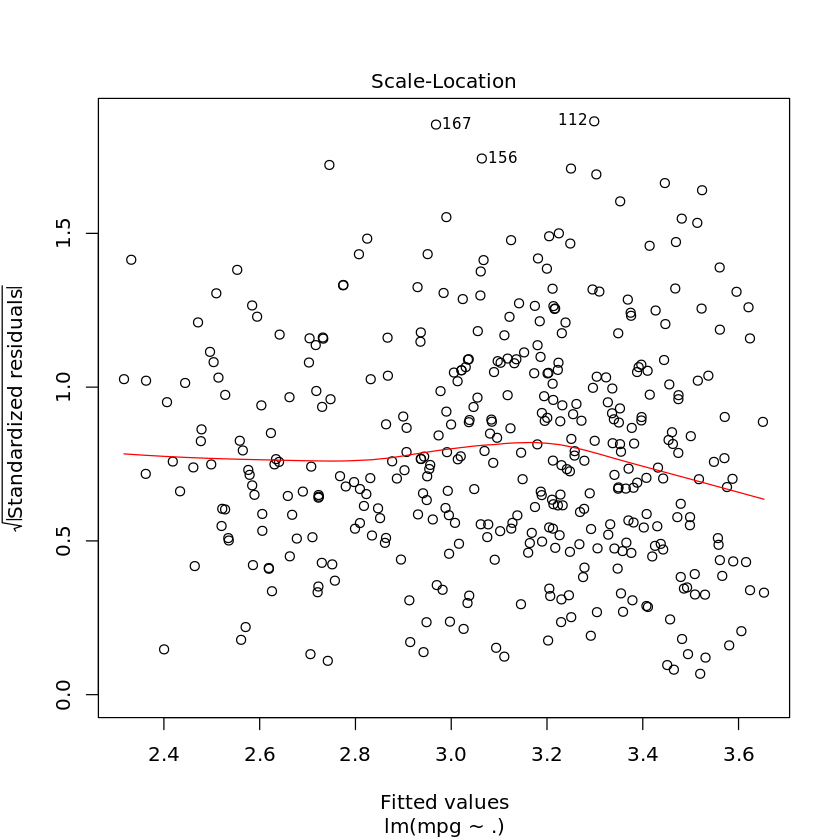

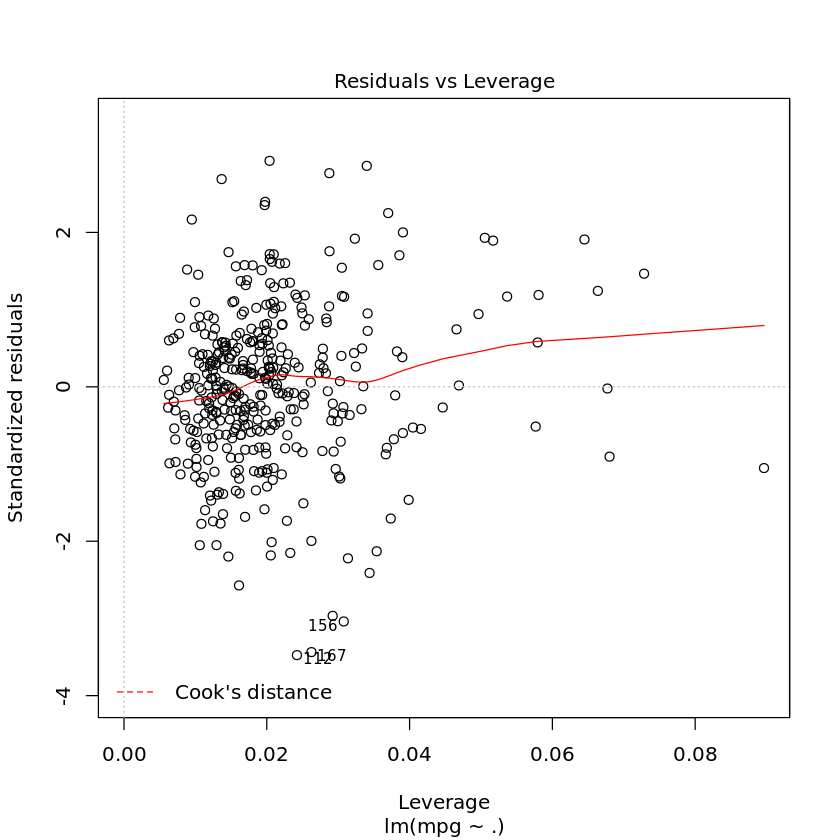

In [8]:
plot(df.lm2)